In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data = pd.read_csv("../../storage/train_data/train250318-01_topic_merged_컬럼삭제안됨.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17250 entries, 0 to 17249
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   공고번호               17250 non-null  int64  
 1   주택명                17250 non-null  object 
 2   공급지역코드             17250 non-null  int64  
 3   공급지역명              17250 non-null  object 
 4   공급위치우편번호           17250 non-null  int64  
 5   공급위치               17250 non-null  object 
 6   공급규모               17250 non-null  int64  
 7   모집공고일              17250 non-null  object 
 8   청약접수시작일            17250 non-null  object 
 9   청약접수종료일            17250 non-null  object 
 10  당첨자발표일             17250 non-null  object 
 11  투기과열지구             17250 non-null  object 
 12  조정대상지역             17250 non-null  object 
 13  분양가상한제             17250 non-null  object 
 14  정비사업               17250 non-null  object 
 15  공공주택지구             17250 non-null  object 
 16  대규모택지개발지구          172

In [79]:
data.columns

Index(['공고번호', '주택명', '공급지역코드', '공급지역명', '공급위치우편번호', '공급위치', '공급규모', '모집공고일',
       '청약접수시작일', '청약접수종료일', '당첨자발표일', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업',
       '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구', '주택형', '공급세대수', '순위', '거주지역',
       '접수건수', '경쟁률', '최저당첨가점', '최고당첨가점', '평균당첨가점', '전용면적', '미달여부',
       '공급금액(최고가 기준)', '위도', '경도', '행정동코드', '법정동코드', '시도', '시군구', '읍면동1',
       '읍면동2', '전용면적당 공급금액(최고가기준)', '전용면적당 시세차익', '기사 번호', '토픽 1', '토픽 2',
       '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '주요 토픽'],
      dtype='object')

In [119]:
# '최고당첨가점' 컬럼에 NaN 값과 '-'를 0으로 변경
data['최고당첨가점'] = data['최고당첨가점'].replace({np.nan: 0, '-': 0})

# '최고당첨가점' 컬럼을 수치형으로 변경
data['최고당첨가점'] = pd.to_numeric(data['최고당첨가점'])

data['최고당첨가점']

0         0
1         0
2         0
3         0
4         0
         ..
17245     0
17246    74
17247     0
17248    73
17249     0
Name: 최고당첨가점, Length: 17250, dtype: int64

In [ ]:
data_1 = data.copy()

In [95]:
from sklearn.preprocessing import MinMaxScaler

# 0이 아닌 최저당첨가점 선택
low_filtered_data = data_1[data_1['최저당첨가점'] != 0]['최저당첨가점'].values.reshape(-1, 1)
high_filtered_data = data_1[data_1['최고당첨가점'] != 0]['최고당첨가점'].values.reshape(-1, 1)


# 정규화된 값을 원본 DataFrame에 적용
data_1.loc[data_1['최저당첨가점'] != 0, '최저당첨가점'] = low_filtered_data
data_1.loc[data_1['최고당첨가점'] != 0, '최고당첨가점'] = high_filtered_data

# 확인
data_1 = data_1[data_1['최저당첨가점'] != 0]
data_1 = data_1[data_1['최고당첨가점'] != 0]

# 규제지역_2와 최저/최고당첨가점 간 상관관계 (드롭해요!)
- 규제지역_2 : 정비사업/공공주택지구/대규모택지개발지구/수도권내민영공공주택지구
- 히트맵 그려서 봤을 때 당첨가점과 상관관계 없음

In [96]:
data_1 = data_1[['공고번호', '주택명','경쟁률', '정비사업', '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구', '최저당첨가점', '최고당첨가점']]
data_1

,공고번호,주택명,경쟁률,정비사업,공공주택지구,대규모택지개발지구,수도권내민영공공주택지구,최저당첨가점,최고당첨가점
44,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),2.60,Y,N,N,N,34.0,49
48,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),2.00,Y,N,N,N,24.0,25
54,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),0.00,Y,N,N,N,33.0,33
60,2025000001,래미안 원페를라,305.14,Y,N,N,N,69.0,74
64,2025000001,래미안 원페를라,307.43,Y,N,N,N,69.0,77
...,...,...,...,...,...,...,...,...,...
17240,2020000298,시흥장현 영무예다음,126.76,N,Y,Y,Y,61.0,70
17242,2020000298,시흥장현 영무예다음,0.00,N,Y,Y,Y,59.0,79
17244,2020000298,시흥장현 영무예다음,45.00,N,Y,Y,Y,63.0,74
17246,2020000298,시흥장현 영무예다음,106.42,N,Y,Y,Y,66.0,74


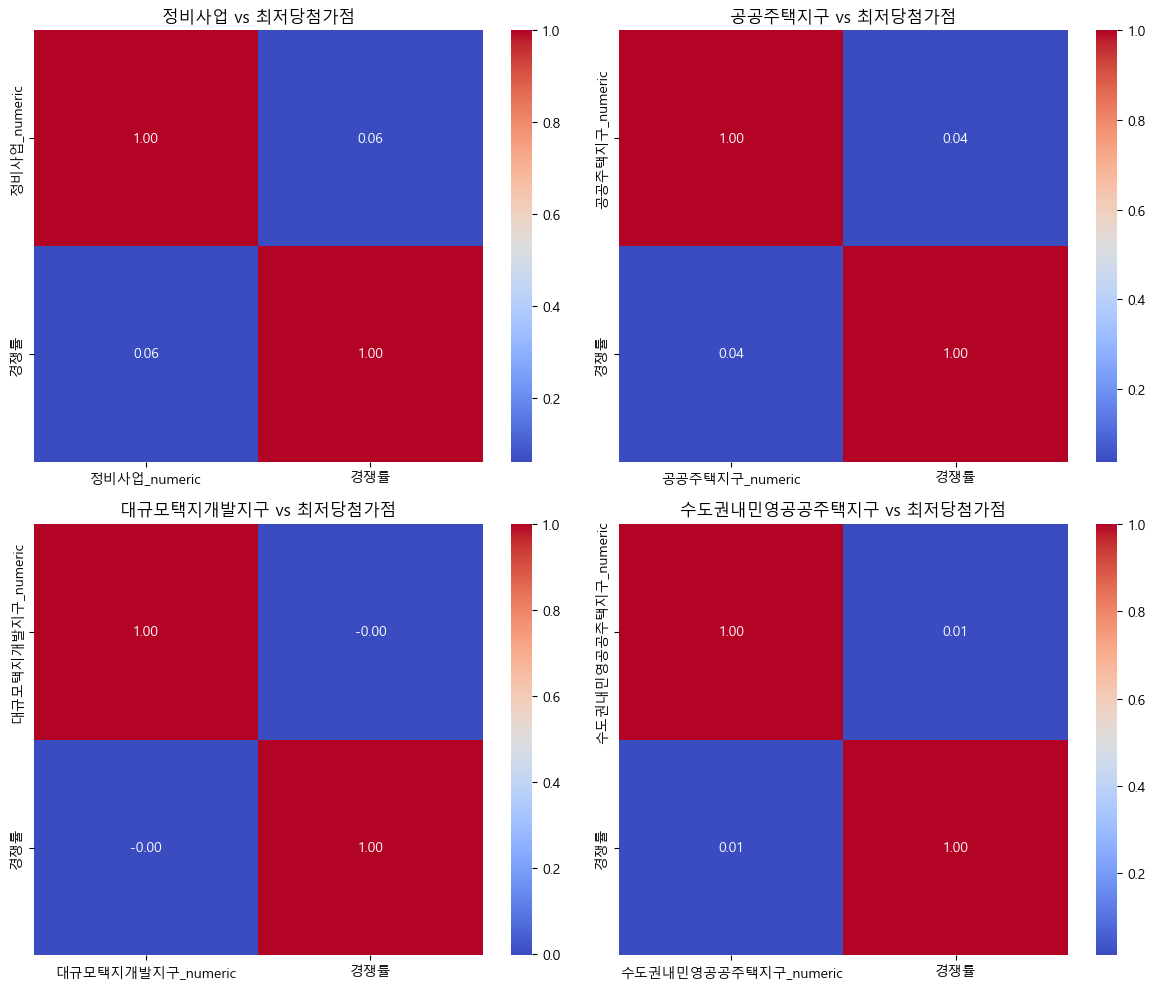

In [170]:
data_1['정비사업_numeric'] = data_1['정비사업'].map({'N': 0, 'Y': 1})
data_1['공공주택지구_numeric'] = data_1['공공주택지구'].map({'N': 0, 'Y': 1})
data_1['대규모택지개발지구_numeric'] = data_1['대규모택지개발지구'].map({'N': 0, 'Y': 1})
data_1['수도권내민영공공주택지구_numeric'] = data_1['수도권내민영공공주택지구'].map({'N': 0, 'Y': 1})

# 상관계수 행렬 생성
cols = ['정비사업_numeric', '공공주택지구_numeric', '대규모택지개발지구_numeric', '수도권내민영공공주택지구_numeric', '경쟁률']
correlation_matrix = data_1[cols].corr()

# 히트맵 시각화 (4개 subplot으로 구성)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = ['정비사업 vs 최저당첨가점', '공공주택지구 vs 최저당첨가점', 
          '대규모택지개발지구 vs 최저당첨가점', '수도권내민영공공주택지구 vs 최저당첨가점']

for ax, col, title in zip(axes.flat, cols[:-1], titles):  
    sns.heatmap(data_1[[col, '경쟁률']].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

### 최저당첨가점

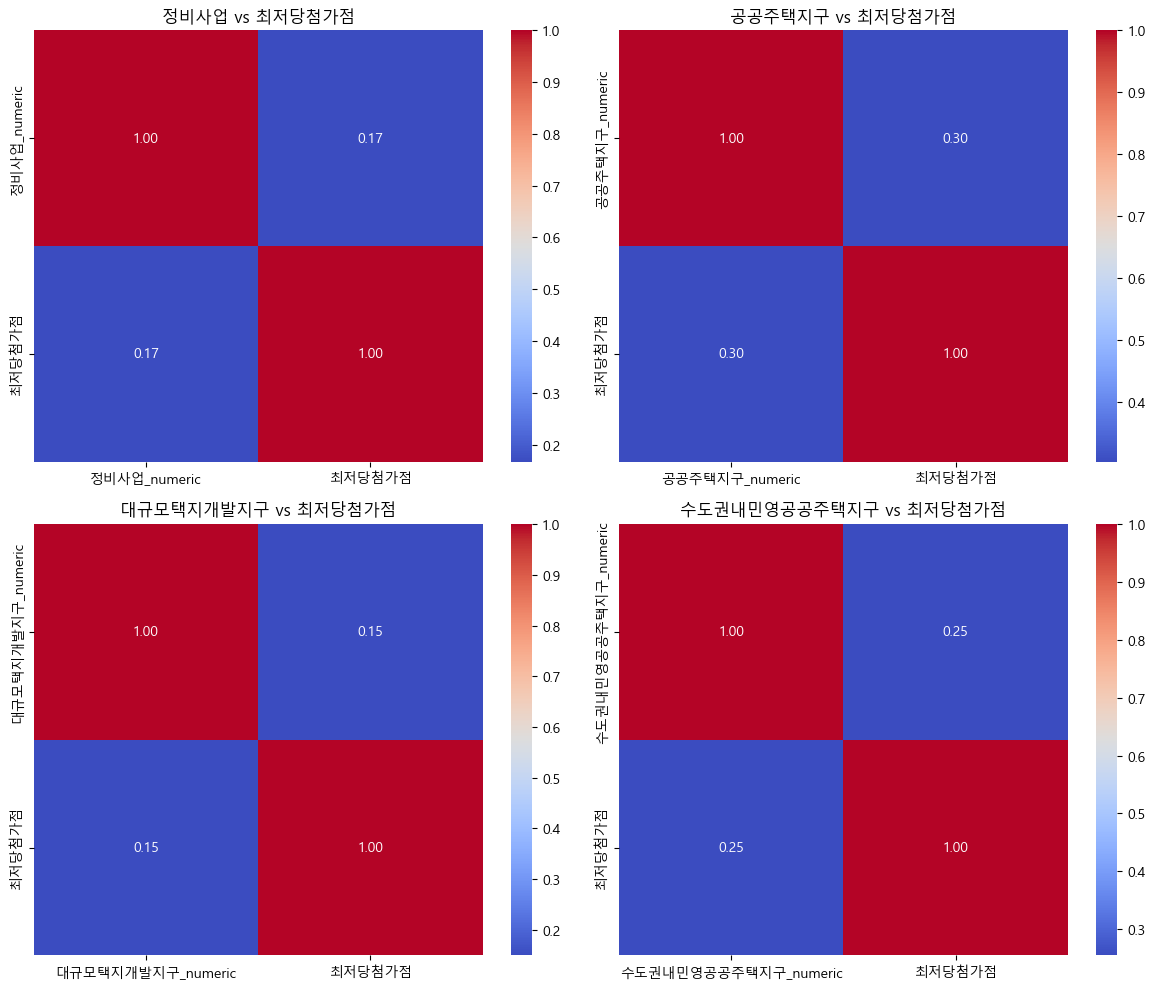

In [101]:
data_1['정비사업_numeric'] = data_1['정비사업'].map({'N': 0, 'Y': 1})
data_1['공공주택지구_numeric'] = data_1['공공주택지구'].map({'N': 0, 'Y': 1})
data_1['대규모택지개발지구_numeric'] = data_1['대규모택지개발지구'].map({'N': 0, 'Y': 1})
data_1['수도권내민영공공주택지구_numeric'] = data_1['수도권내민영공공주택지구'].map({'N': 0, 'Y': 1})

# 상관계수 행렬 생성
cols = ['정비사업_numeric', '공공주택지구_numeric', '대규모택지개발지구_numeric', '수도권내민영공공주택지구_numeric', '최저당첨가점']
correlation_matrix = data_1[cols].corr()

# 히트맵 시각화 (4개 subplot으로 구성)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = ['정비사업 vs 최저당첨가점', '공공주택지구 vs 최저당첨가점', 
          '대규모택지개발지구 vs 최저당첨가점', '수도권내민영공공주택지구 vs 최저당첨가점']

for ax, col, title in zip(axes.flat, cols[:-1], titles):  
    sns.heatmap(data_1[[col, '최저당첨가점']].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

### 최고당첨가점

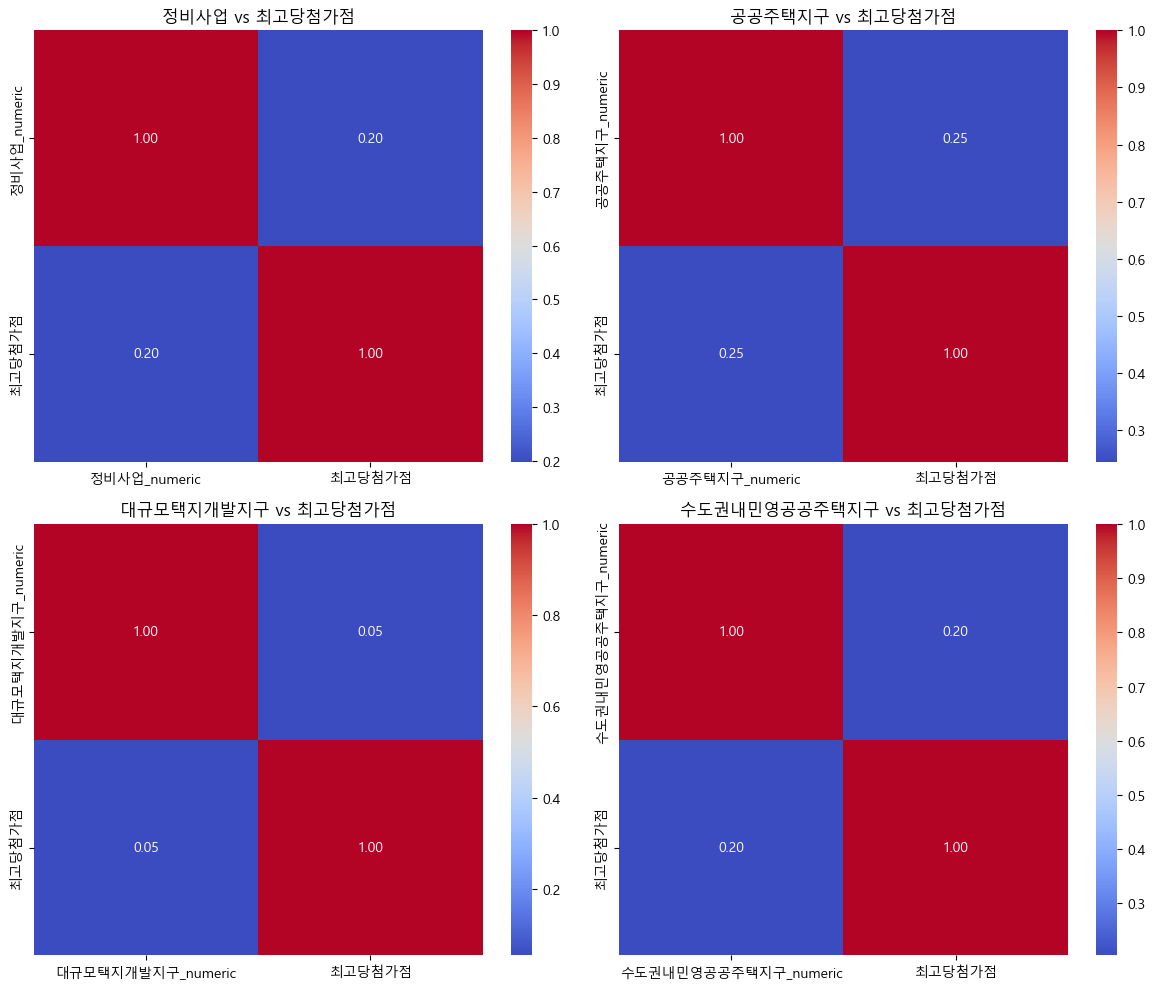

In [102]:
data_1['정비사업_numeric'] = data_1['정비사업'].map({'N': 0, 'Y': 1})
data_1['공공주택지구_numeric'] = data_1['공공주택지구'].map({'N': 0, 'Y': 1})
data_1['대규모택지개발지구_numeric'] = data_1['대규모택지개발지구'].map({'N': 0, 'Y': 1})
data_1['수도권내민영공공주택지구_numeric'] = data_1['수도권내민영공공주택지구'].map({'N': 0, 'Y': 1})

# 상관계수 행렬 생성
cols = ['정비사업_numeric', '공공주택지구_numeric', '대규모택지개발지구_numeric', '수도권내민영공공주택지구_numeric', '최고당첨가점']
correlation_matrix = data_1[cols].corr()

# 히트맵 시각화 (4개 subplot으로 구성)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = ['정비사업 vs 최고당첨가점', '공공주택지구 vs 최고당첨가점', 
          '대규모택지개발지구 vs 최고당첨가점', '수도권내민영공공주택지구 vs 최고당첨가점']

for ax, col, title in zip(axes.flat, cols[:-1], titles):  
    sns.heatmap(data_1[[col, '최고당첨가점']].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [111]:
data.columns

Index(['공고번호', '주택명', '공급지역코드', '공급지역명', '공급위치우편번호', '공급위치', '공급규모', '모집공고일',
       '청약접수시작일', '청약접수종료일', '당첨자발표일', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업',
       '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구', '주택형', '공급세대수', '순위', '거주지역',
       '접수건수', '경쟁률', '최저당첨가점', '최고당첨가점', '평균당첨가점', '전용면적', '미달여부',
       '공급금액(최고가 기준)', '위도', '경도', '행정동코드', '법정동코드', '시도', '시군구', '읍면동1',
       '읍면동2', '전용면적당 공급금액(최고가기준)', '전용면적당 시세차익', '기사 번호', '토픽 1', '토픽 2',
       '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '주요 토픽'],
      dtype='object')

In [116]:
data.drop(['정비사업', '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구'], axis=1, inplace=True)
data.columns

Index(['공고번호', '주택명', '공급지역코드', '공급지역명', '공급위치우편번호', '공급위치', '공급규모', '모집공고일',
       '청약접수시작일', '청약접수종료일', '당첨자발표일', '투기과열지구', '조정대상지역', '분양가상한제', '주택형',
       '공급세대수', '순위', '거주지역', '접수건수', '경쟁률', '최저당첨가점', '최고당첨가점', '평균당첨가점',
       '전용면적', '미달여부', '공급금액(최고가 기준)', '위도', '경도', '행정동코드', '법정동코드', '시도',
       '시군구', '읍면동1', '읍면동2', '전용면적당 공급금액(최고가기준)', '전용면적당 시세차익', '기사 번호',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '주요 토픽'],
      dtype='object')

# 공급세대수/규모/접수건수/경쟁률 칼럼 분석

In [183]:
data_2 = data.copy()

In [184]:
data_2 = data_2[['공고번호', '주택명', '공급규모', '공급세대수', '접수건수', '경쟁률', '최저당첨가점', '최고당첨가점', '위도', '경도']]
data_2

,공고번호,주택명,공급규모,공급세대수,접수건수,경쟁률,최저당첨가점,최고당첨가점,위도,경도
0,2025000043,부천 JY 포에시아,55,5,0,0.00,0.0,0,37.485377,126.776922
1,2025000043,부천 JY 포에시아,55,5,15,3.00,0.0,0,37.485377,126.776922
2,2025000043,부천 JY 포에시아,55,5,3,0.00,0.0,0,37.485377,126.776922
3,2025000043,부천 JY 포에시아,55,5,10,0.00,0.0,0,37.485377,126.776922
4,2025000043,부천 JY 포에시아,55,5,1,0.20,0.0,0,37.485377,126.776922
...,...,...,...,...,...,...,...,...,...,...
17245,2020000298,시흥장현 영무예다음,747,216,0,188.23,0.0,0,37.380161,126.790527
17246,2020000298,시흥장현 영무예다음,747,216,0,106.42,66.0,74,37.380161,126.790527
17247,2020000298,시흥장현 영무예다음,747,216,0,0.00,0.0,0,37.380161,126.790527
17248,2020000298,시흥장현 영무예다음,747,216,0,0.00,63.0,73,37.380161,126.790527


In [185]:
# '최고당첨가점' 컬럼에 NaN 값과 '-'를 0으로 변경
data_2['최고당첨가점'] = data_2['최고당첨가점'].replace({np.nan: 0, '-': 0})

# '최고당첨가점' 컬럼을 수치형으로 변경
data_2['최고당첨가점'] = pd.to_numeric(data['최고당첨가점'])

data_2['최고당첨가점']

0         0
1         0
2         0
3         0
4         0
         ..
17245     0
17246    74
17247     0
17248    73
17249     0
Name: 최고당첨가점, Length: 17250, dtype: int64

In [186]:
from sklearn.preprocessing import MinMaxScaler

# 0이 아닌 최저당첨가점 선택
low_filtered_data = data_2[data_2['최저당첨가점'] != 0]['최저당첨가점'].values.reshape(-1, 1)
high_filtered_data = data_2[data_2['최고당첨가점'] != 0]['최고당첨가점'].values.reshape(-1, 1)


# 정규화된 값을 원본 DataFrame에 적용
data_2.loc[data_2['최저당첨가점'] != 0, '최저당첨가점'] = low_filtered_data
data_2.loc[data_2['최고당첨가점'] != 0, '최고당첨가점'] = high_filtered_data

# 확인
data_2 = data_2[data_2['최저당첨가점'] != 0]
data_2 = data_2[data_2['최고당첨가점'] != 0]

In [187]:
data_2

,공고번호,주택명,공급규모,공급세대수,접수건수,경쟁률,최저당첨가점,최고당첨가점,위도,경도
44,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),29,5,13,2.60,34.0,49,37.461024,126.657793
48,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),29,4,8,2.00,24.0,25,37.461024,126.657793
54,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),29,3,1,0.00,33.0,33,37.461024,126.657793
60,2025000001,래미안 원페를라,482,35,0,305.14,69.0,74,37.491279,126.987523
64,2025000001,래미안 원페를라,482,30,0,307.43,69.0,77,37.491279,126.987523
...,...,...,...,...,...,...,...,...,...,...
17240,2020000298,시흥장현 영무예다음,747,57,0,126.76,61.0,70,37.380161,126.790527
17242,2020000298,시흥장현 영무예다음,747,57,0,0.00,59.0,79,37.380161,126.790527
17244,2020000298,시흥장현 영무예다음,747,216,0,45.00,63.0,74,37.380161,126.790527
17246,2020000298,시흥장현 영무예다음,747,216,0,106.42,66.0,74,37.380161,126.790527


In [161]:
import folium
import numpy as np
import branca

# 지도 중심 위치 설정 (서울 중심 좌표)
map_center = [37.541, 126.986]
m = folium.Map(location=map_center, zoom_start=12, width="100%", height="100%")

# 색상 범례 설정 (공급세대수에 따른 색상 변화, 파스텔톤 팔레트)
color_scale = branca.colormap.LinearColormap(
    ["#f0e5cf", "#f6c8b6", "#f5a0b7", "#ee5c83", "#e31c68"], 
    vmin=data_2["공급세대수"].min(), 
    vmax=data_2["공급세대수"].max()
)
color_scale.caption = "공급세대수에 따른 색상 변화"

# 마커 추가
for idx, row in data_2.dropna().iterrows():
    # 공급세대수가 350건 이상인 경우만 표시
    if row["공급세대수"] >= 350:
        # 반지름 크기 조정 (로그 스케일 적용)
        radius = np.log1p(row["공급규모"]) * 5  # log(공급규모) * 5 → 크기 범위 조절
        
        # 색상 설정 (공급세대수가 클수록 짙은 색)
        color = color_scale(row["공급세대수"])
        
        # 투명도 조정 (공급세대수가 클수록 불투명)
        fill_opacity = min(0.2 + row["공급세대수"] / 1000, 0.9)  # 최대 0.9까지 증가

        # 지도에 CircleMarker 추가
        folium.CircleMarker(
            location=[row["위도"], row["경도"]],
            radius=radius,  # 크기 조정
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=fill_opacity,
            popup=f"공급세대수: {row['공급세대수']}<br>접수건수: {row['접수건수']}<br>경쟁률: {row['경쟁률']}"
        ).add_to(m)

         # 공급세대수를 원 위에 표시 (텍스트 레이블)
        folium.Marker(
            location=[row["위도"], row["경도"]],
            icon=folium.DivIcon(
                icon_size=(10, 10),  # Smaller icon size
                icon_anchor=(0, 0),  # Position the icon relative to the marker's position
                html=f'<div style="font-size: 8pt; color: black; font-weight: medium; text-align: center;">{row["공급세대수"]}</div>'
            )
        ).add_to(m)

# 색상 범례 지도에 추가
m.add_child(color_scale)

m


In [202]:


fig = px.scatter(
    data_frame = data_2,
    x='공급세대수',
    y='접수건수',
    color='공급규모',  # 여기서 color로 범례 설정
    color_discrete_sequence=px.colors.qualitative.Set2_r,
    template='plotly_white'
)
fig.show()

In [168]:
data_2[data_2['공급규모'] == 4786]

,공고번호,주택명,공급규모,공급세대수,접수건수,경쟁률,최저당첨가점,최고당첨가점,위도,경도
6914,2022000846,올림픽파크 포레온,4786,5,64,12.80,54.0,67,37.526848,127.13895
6920,2022000846,올림픽파크 포레온,4786,541,154,0.00,26.0,64,37.526848,127.13895
6922,2022000846,올림픽파크 포레온,4786,424,656,1.55,20.0,69,37.526848,127.13895
6926,2022000846,올림픽파크 포레온,4786,936,0,5.21,51.0,77,37.526848,127.13895
6930,2022000846,올림픽파크 포레온,4786,302,0,3.71,49.0,72,37.526848,127.13895
6934,2022000846,올림픽파크 포레온,4786,149,597,4.01,46.0,69,37.526848,127.13895
6938,2022000846,올림픽파크 포레온,4786,54,476,8.81,62.0,74,37.526848,127.13895
6942,2022000846,올림픽파크 포레온,4786,47,290,6.17,53.0,71,37.526848,127.13895
6946,2022000846,올림픽파크 포레온,4786,209,0,9.42,64.0,74,37.526848,127.13895
6950,2022000846,올림픽파크 포레온,4786,21,138,6.57,54.0,74,37.526848,127.13895


In [203]:

# Make sure all columns are numeric
data_2_clean = data_2[['공급세대수', '접수건수', '공급규모', '최저당첨가점', '최고당첨가점', '경쟁률']]

# Convert columns to numeric values (if not already numeric)
data_2_clean = data_2_clean.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data_2_clean = data_2_clean.dropna()

# Now compute the correlation matrix
correlation_matrix = data_2_clean.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

           공급세대수      접수건수      공급규모    최저당첨가점    최고당첨가점       경쟁률
공급세대수   1.000000  0.058696  0.448670 -0.179467  0.215782 -0.040809
접수건수    0.058696  1.000000  0.083624  0.069229  0.164953 -0.019716
공급규모    0.448670  0.083624  1.000000 -0.079177  0.173616 -0.054202
최저당첨가점 -0.179467  0.069229 -0.079177  1.000000  0.641927  0.153584
최고당첨가점  0.215782  0.164953  0.173616  0.641927  1.000000  0.119293
경쟁률    -0.040809 -0.019716 -0.054202  0.153584  0.119293  1.000000
